# Figures

Notebook used to generate the figures that are not directly related to the experiments.

In [1]:
import os
root_depth = "../depth"

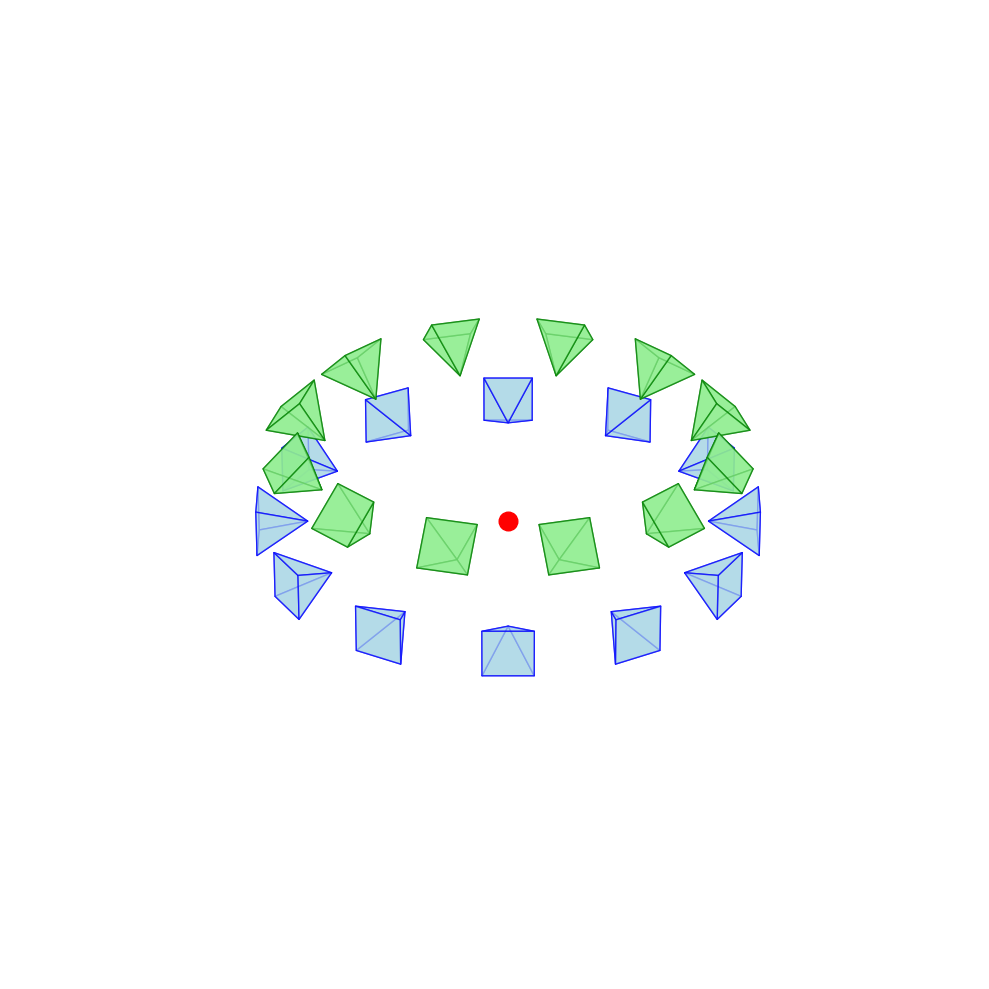

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


def create_camera_pyramid(position, direction, size=0.2):

    direction = direction / np.linalg.norm(direction)
    
    if np.allclose(direction, [0, 0, 1]) or np.allclose(direction, [0, 0, -1]):
        up = np.array([0, 1, 0])
    else:
        up = np.array([0, 0, 1])
    
    right = np.cross(direction, up)
    right = right / np.linalg.norm(right)
    
    up = np.cross(right, direction)
    up = up / np.linalg.norm(up)
    
    apex = np.array(position) + size * direction
    
    base_center = np.array(position)
    
    half_size = size / 2
    base_corners = [
        base_center + half_size * up + half_size * right,
        base_center + half_size * up - half_size * right,
        base_center - half_size * up - half_size * right,
        base_center - half_size * up + half_size * right
    ]
    
    vertices = [apex] + base_corners
    
    faces = [
        [vertices[0], vertices[1], vertices[2]],  # triangular face 1
        [vertices[0], vertices[2], vertices[3]],  # triangular face 2
        [vertices[0], vertices[3], vertices[4]],  # triangular face 3
        [vertices[0], vertices[4], vertices[1]],  # triangular face 4
        [vertices[1], vertices[2], vertices[3], vertices[4]]  # square base
    ]
    
    return vertices, faces

def visualize_cameras_on_circle(num_cameras=8, radius=1.0, height=0.5, camera_size=0.2, add_second_row=True, second_row_height=0.8):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    camera_angles = np.linspace(0, 2*np.pi, num_cameras, endpoint=False)
    
    for angle in camera_angles:
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        z = height
        position = [x, y, z]
        
        direction = [-x, -y, 0]  # Pointing horizontally inward
        direction = direction / np.linalg.norm(direction)
        
        vertices, faces = create_camera_pyramid(position, direction, camera_size)
        
        collection = Poly3DCollection([face for face in faces], alpha=0.7)
        collection.set_facecolor('lightblue')
        collection.set_edgecolor('blue')
        ax.add_collection3d(collection)
        
    if add_second_row:
        second_row_angles = camera_angles + (np.pi / num_cameras)
        
        for angle in second_row_angles:
            x = 0.9*radius * np.cos(angle)
            y = 0.9*radius * np.sin(angle)
            z = second_row_height
            position = [x, y, z]
            
            direction = [-x, -y, -z]  # Pointing toward the origin
            direction = direction / np.linalg.norm(direction)
            
            vertices, faces = create_camera_pyramid(position, direction, camera_size)
            
            # Top pyramid
            collection = Poly3DCollection([face for face in faces], alpha=0.7)
            collection.set_facecolor('lightgreen')
            collection.set_edgecolor('green')
            ax.add_collection3d(collection)

    limit = radius + camera_size
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    ax.set_zlim(0, radius + camera_size)
    ax.set_box_aspect([1, 1, 1])


    ax.scatter(0, 0, height, color='red', s=180, depthshade=True)
    
    limit = radius + camera_size
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    ax.set_zlim(0, radius + camera_size)
    
    ax.set_box_aspect([1, 1, 1])
    
    plt.tight_layout()
    plt.axis("equal")
    plt.axis("off")
    plt.savefig("images/cameras_setup_with_dot.png", bbox_inches='tight', transparent=True, pad_inches=0.0, dpi=300)
    plt.show()


visualize_cameras_on_circle(
    num_cameras=12, 
    radius=1.0, 
    height=0.5, 
    camera_size=0.2,
    add_second_row=True,
    second_row_height=0.9
)

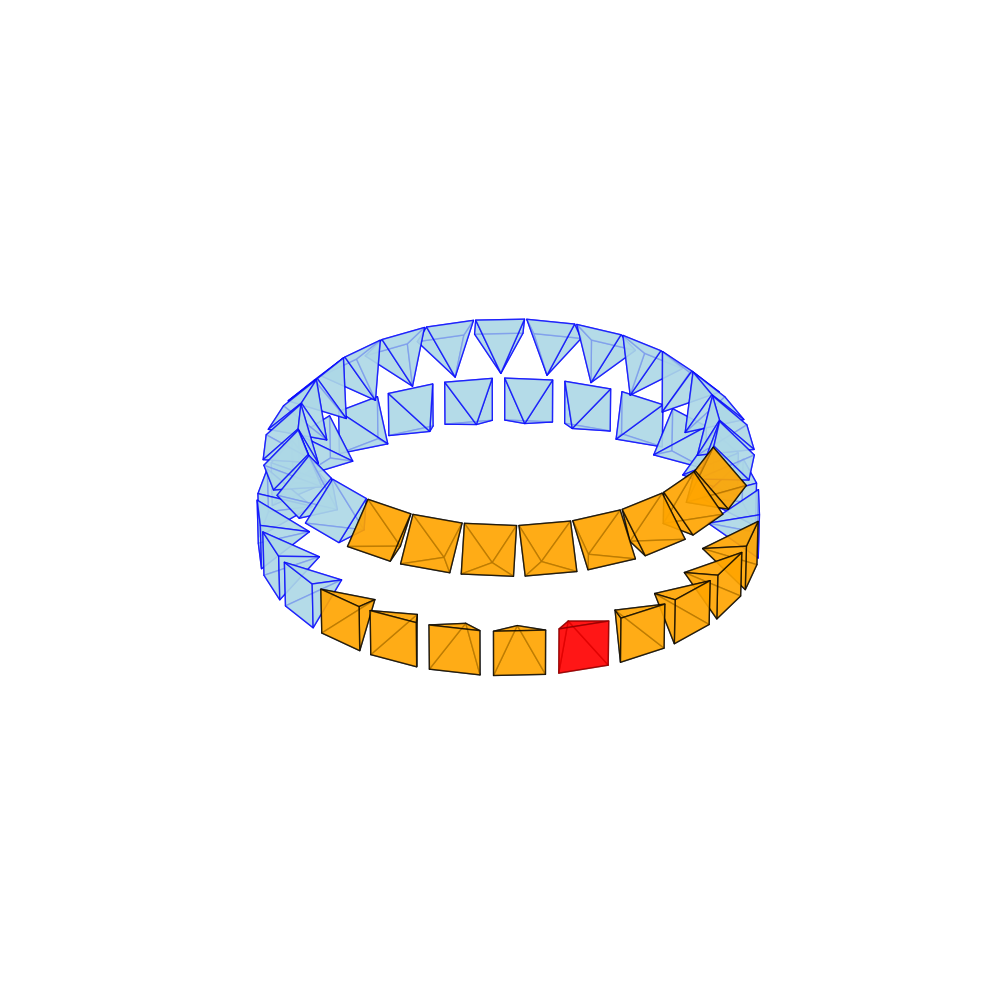

In [ ]:
def create_camera_pyramid(position, direction, size=0.2):
    direction = direction / np.linalg.norm(direction)
    
    if np.allclose(direction, [0, 0, 1]) or np.allclose(direction, [0, 0, -1]):
        up = np.array([0, 1, 0])
    else:
        up = np.array([0, 0, 1])
    
    right = np.cross(direction, up)
    right = right / np.linalg.norm(right)
    
    up = np.cross(right, direction)
    up = up / np.linalg.norm(up)
    
    # Apex
    apex = np.array(position) + size * direction
    
    base_center = np.array(position)
    
    # Corners
    half_size = size / 2
    base_corners = [
        base_center + half_size * up + half_size * right,
        base_center + half_size * up - half_size * right,
        base_center - half_size * up - half_size * right,
        base_center - half_size * up + half_size * right
    ]
    
    # Vertices
    vertices = [apex] + base_corners
    
    # Faces
    faces = [
        [vertices[0], vertices[1], vertices[2]],  # triangular face 1
        [vertices[0], vertices[2], vertices[3]],  # triangular face 2
        [vertices[0], vertices[3], vertices[4]],  # triangular face 3
        [vertices[0], vertices[4], vertices[1]],  # triangular face 4
        [vertices[1], vertices[2], vertices[3], vertices[4]]  # square base
    ]
    
    return vertices, faces

def visualize_cameras_on_circle(num_cameras=8, radius=1.0, height=0.5, camera_size=0.2, add_second_row=True, second_row_height=0.8):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    camera_angles = np.linspace(0, 2*np.pi, num_cameras, endpoint=False)
    
    bottom_closest_index = 22
    
    for i, angle in enumerate(camera_angles):
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        z = height
        position = [x, y, z]
        
        direction = [-x, -y, 0]
        direction = direction / np.linalg.norm(direction)

        vertices, faces = create_camera_pyramid(position, direction, camera_size)
        
        if i == bottom_closest_index:
            # Closest camera on the bottom row (front) - RED
            face_color = 'red'
            edge_color = 'darkred'
        elif i in [21, 20, 19, 18, 23, 24, 0, 1]:
            face_color = 'orange'
            edge_color = 'black'
        else:
            # Remaining bottom cameras
            face_color = 'lightblue'
            edge_color = 'blue'
        
        collection = Poly3DCollection([face for face in faces], alpha=0.7)
        collection.set_facecolor(face_color)
        collection.set_edgecolor(edge_color)
        ax.add_collection3d(collection)
        
    # Upper row
    if add_second_row:
        second_row_angles = camera_angles + (np.pi / num_cameras)
        
        for i, angle in enumerate(second_row_angles):
            x = 0.9 * radius * np.cos(angle)
            y = 0.9 * radius * np.sin(angle)
            z = second_row_height
            position = [x, y, z]
            
            direction = [-x, -y, -z]  # Pointing toward the origin
            direction = direction / np.linalg.norm(direction)
            
            vertices, faces = create_camera_pyramid(position, direction, camera_size)
            if i in [18, 19, 20, 21, 22, 23, 24, 0]:
                face_color = 'orange'
                edge_color = 'black'
            else:
                face_color = 'lightblue'
                edge_color = 'blue'
            
            collection = Poly3DCollection([face for face in faces], alpha=0.7)
            collection.set_facecolor(face_color)
            collection.set_edgecolor(edge_color)
            ax.add_collection3d(collection)
    
    limit = radius + camera_size
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    ax.set_zlim(0, radius + camera_size)
    ax.set_box_aspect([1, 1, 1])
    
    plt.tight_layout()
    plt.axis("equal")
    plt.axis("off")
    plt.savefig("images/cameras_neigh.png", bbox_inches='tight', transparent=True, pad_inches=0.0, dpi=300)
    plt.show()


visualize_cameras_on_circle(
    num_cameras=25, 
    radius=1.0, 
    height=0.5, 
    camera_size=0.2,
    add_second_row=True,
    second_row_height=0.9
)

### Plot some depth maps

In [2]:
from depth.old import load_gt_depth_map
import matplotlib.pyplot as plt
import numpy as np

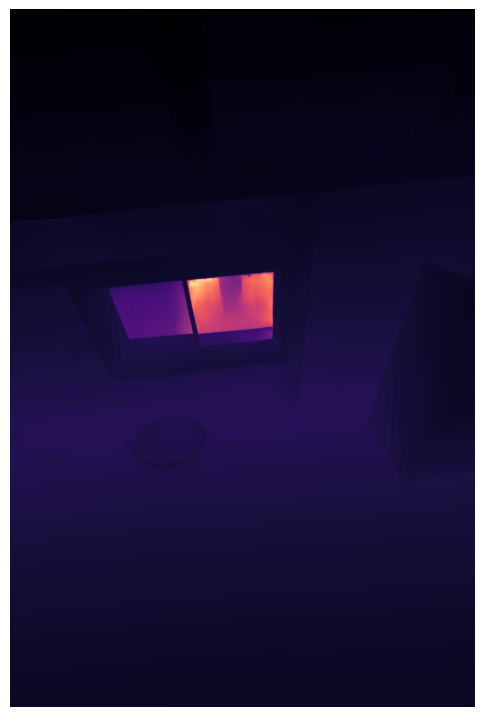

In [ ]:
# Depth pro WON'T WORK BECAUSE IF DEPTH MAPS ARE NOT UNZIPPED
to_load = os.path.joint(root_depth, "depth_pro", "depth_pro/008.png")
depth = load_gt_depth_map(to_load, 3.3333333333333335, 10000.0)
plt.figure(figsize=(6,12))
plt.axis("off")
plt.imshow(depth*0.15, cmap="magma")
plt.savefig("images/deep_depth008.png", bbox_inches='tight', transparent=True, pad_inches=0.0, dpi=300)
plt.close()

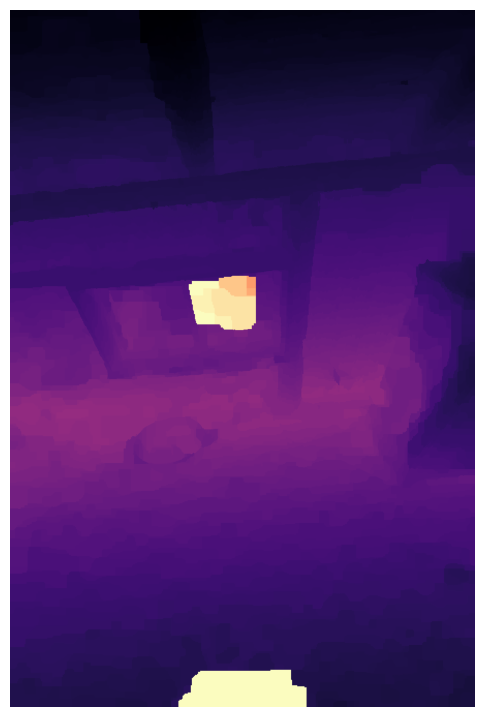

In [ ]:
# MVS - CHANGE THE PATH TO POINT TO THE DEPTH MAPS
to_load = "res/dense/depthmaps/008.png"
depth = load_gt_depth_map(to_load, 3.3333333333333335, 10000.0)
plt.figure(figsize=(6,12))
plt.axis("off")
plt.imshow(np.clip(depth*0.15, 0.5, 6), cmap="magma")
plt.savefig("images/depth008.png", bbox_inches='tight', transparent=True, pad_inches=0.0, dpi=300)
# plt.close()

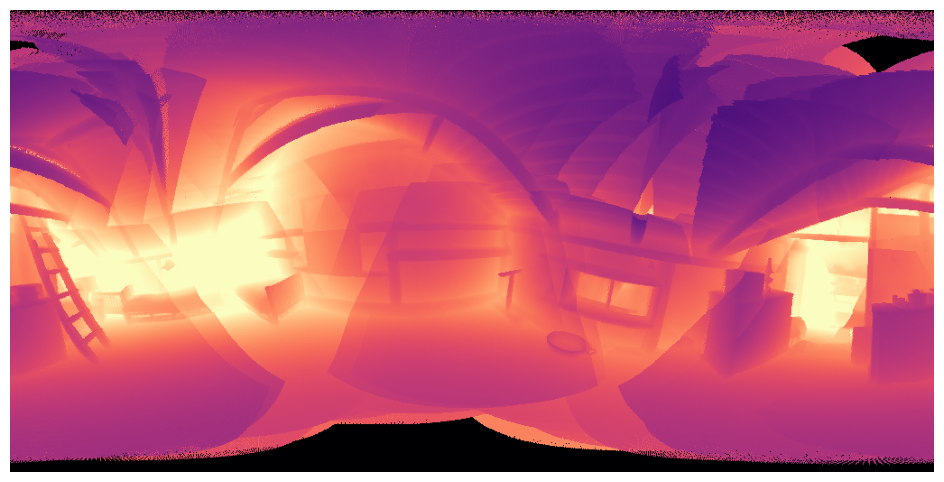

In [3]:
import numpy as np
import matplotlib.pyplot as plt
a = np.load("../panorama_deep.npy")
a = np.nan_to_num(a, 0)
r, c = a.shape
plt.figure(figsize=(12,int(12*r/c)))
plt.axis("off")
plt.imshow(np.clip(a, 0, 0.003), cmap="magma")
plt.savefig("images/deep_depth_full_panorama_front.png", bbox_inches='tight', transparent=True, pad_inches=0.0, dpi=300)